### 0. Questions

 - What are Decision Trees?

### 1. Import packages

First, let's import needed modules and set random seed (we'll use it if needed).

In [36]:
import os
import sys
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

SEED = 42

### 2. Data preparation

#### 2.1 Loading Iris dataset

I'm going to use only first two features for now for better visualization and analysis

In [68]:
X, y = datasets.load_iris(return_X_y=True)

In [89]:
X, y = datasets.load_iris(return_X_y=True)
X = X[:, 1::2]

In [90]:
feature_names = datasets.load_iris().feature_names
print(f"All features: {', '.join(feature_names)}")
feature_names = feature_names[1::2]
print(f"Selected features: {', '.join(feature_names)}")

All features: sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)
Selected features: sepal width (cm), petal width (cm)


#### 2.2 Splitting the data

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

### 3. Predictive modelling

#### 3.1 Sklearn's implementation of Decision Trees Classifier

In [92]:
dt = DecisionTreeClassifier(max_depth=3, random_state=SEED)
dt.fit(X_train, y_train)
pred_sklearn = dt.predict(X_test)

f1_sklearn = f1_score(y_true=y_test, y_pred=pred_sklearn, average='weighted').round(2)
print(f'F1 is equal to {f1_sklearn}')

F1 is equal to 1.0


#### 3.2 Vizualization of separation boundary

In [93]:
# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

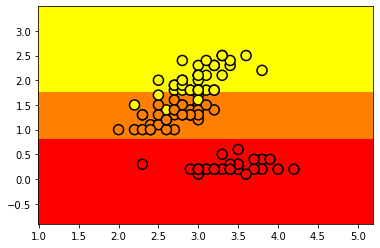

In [94]:
# some code to depict separating surface
xx, yy = get_grid(X_train)
predicted = dt.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap="autumn", shading='auto')
plt.scatter(
    X_train[:, 0],
    X_train[:, 1],
    c=y_train,
    s=100,
    cmap="autumn",
    edgecolors="black",
    linewidth=1.5
)

In [95]:
import pydotplus  # pip install pydotplus
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    """
    This requires GraphViz to be installed.  
    """
    
    tree_str = export_graphviz(
        tree, feature_names=feature_names, filled=True, out_file=None
    )
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(png_file_to_save)

In [96]:
tree_graph_to_png(
    tree=dt,
    feature_names=feature_names,
    png_file_to_save="img/decision_tree1.png",
)

![Decision Tree for Iris dataset](img/decision_tree1.png)

### TODO: 
 - Replace Iris dataset with synthetic dataset